In [1]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.3 MB/s eta 0:00:00


In [2]:
import datasets

dataset = datasets.load_dataset('imdb')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

In [4]:
dataset['train']['text'][0]

'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far between, ev

In [5]:
from torchtext.data.utils import get_tokenizer
tokenizer = get_tokenizer('basic_english')

In [6]:
tokenizer(dataset['train']['text'][0])

['i',
 'rented',
 'i',
 'am',
 'curious-yellow',
 'from',
 'my',
 'video',
 'store',
 'because',
 'of',
 'all',
 'the',
 'controversy',
 'that',
 'surrounded',
 'it',
 'when',
 'it',
 'was',
 'first',
 'released',
 'in',
 '1967',
 '.',
 'i',
 'also',
 'heard',
 'that',
 'at',
 'first',
 'it',
 'was',
 'seized',
 'by',
 'u',
 '.',
 's',
 '.',
 'customs',
 'if',
 'it',
 'ever',
 'tried',
 'to',
 'enter',
 'this',
 'country',
 ',',
 'therefore',
 'being',
 'a',
 'fan',
 'of',
 'films',
 'considered',
 'controversial',
 'i',
 'really',
 'had',
 'to',
 'see',
 'this',
 'for',
 'myself',
 '.',
 'the',
 'plot',
 'is',
 'centered',
 'around',
 'a',
 'young',
 'swedish',
 'drama',
 'student',
 'named',
 'lena',
 'who',
 'wants',
 'to',
 'learn',
 'everything',
 'she',
 'can',
 'about',
 'life',
 '.',
 'in',
 'particular',
 'she',
 'wants',
 'to',
 'focus',
 'her',
 'attentions',
 'to',
 'making',
 'some',
 'sort',
 'of',
 'documentary',
 'on',
 'what',
 'the',
 'average',
 'swede',
 'thought',


In [7]:
def split_tokens(row):
    row['tokens'] = tokenizer(row['text'])
    return row

In [8]:
dataset = dataset.map(split_tokens)

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [9]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'tokens'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'tokens'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label', 'tokens'],
        num_rows: 50000
    })
})

In [10]:
dataset['train']['text'][123]

"This fanciful horror flick has Vincent Price playing a mad magician that realizes his vocational talents have been sold to another. He devise ways of avenging all those that have wronged him. His master scheme seems to back fire on him.<br /><br />Price is a little below par compared to his masterpieces, but is still the only reason to watch this thriller. Supporting cast includes Patrick O'Neal, Mary Murphy, Eva Gabor and Jay Novello.<br /><br />"

In [11]:
dataset['train']['tokens'][123]

['this',
 'fanciful',
 'horror',
 'flick',
 'has',
 'vincent',
 'price',
 'playing',
 'a',
 'mad',
 'magician',
 'that',
 'realizes',
 'his',
 'vocational',
 'talents',
 'have',
 'been',
 'sold',
 'to',
 'another',
 '.',
 'he',
 'devise',
 'ways',
 'of',
 'avenging',
 'all',
 'those',
 'that',
 'have',
 'wronged',
 'him',
 '.',
 'his',
 'master',
 'scheme',
 'seems',
 'to',
 'back',
 'fire',
 'on',
 'him',
 '.',
 'price',
 'is',
 'a',
 'little',
 'below',
 'par',
 'compared',
 'to',
 'his',
 'masterpieces',
 ',',
 'but',
 'is',
 'still',
 'the',
 'only',
 'reason',
 'to',
 'watch',
 'this',
 'thriller',
 '.',
 'supporting',
 'cast',
 'includes',
 'patrick',
 'o',
 "'",
 'neal',
 ',',
 'mary',
 'murphy',
 ',',
 'eva',
 'gabor',
 'and',
 'jay',
 'novello',
 '.']

In [12]:
from torchtext.vocab import build_vocab_from_iterator

vocab_custom = build_vocab_from_iterator(dataset['train']['tokens'],
                                         min_freq=3,
                                         specials=['<unk>'])

In [13]:
vocab_custom['dog']

894

In [14]:
vocab_custom['<unk>']

0

In [15]:
vocab_custom.set_default_index(vocab_custom['<unk>'])

In [16]:
vocab_custom['cbum']

0

In [17]:
len(vocab_custom)

40251

In [18]:
def vocab(tokens):
  result = []
  for token in tokens:
    result.append(vocab_custom[token])

  return result

In [19]:
vocab(['the', 'book', 'is', 'on', 'the', 'table', 'cbum'])

[1, 275, 9, 27, 1, 2724, 0]

In [20]:
def token2id(row):
    row['tokens_id'] = vocab(row['tokens'])
    return row

In [21]:
dataset = dataset.map(token2id)

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [22]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'tokens', 'tokens_id'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'tokens', 'tokens_id'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label', 'tokens', 'tokens_id'],
        num_rows: 50000
    })
})

In [23]:
print(dataset['train']['tokens'][123])

['this', 'fanciful', 'horror', 'flick', 'has', 'vincent', 'price', 'playing', 'a', 'mad', 'magician', 'that', 'realizes', 'his', 'vocational', 'talents', 'have', 'been', 'sold', 'to', 'another', '.', 'he', 'devise', 'ways', 'of', 'avenging', 'all', 'those', 'that', 'have', 'wronged', 'him', '.', 'his', 'master', 'scheme', 'seems', 'to', 'back', 'fire', 'on', 'him', '.', 'price', 'is', 'a', 'little', 'below', 'par', 'compared', 'to', 'his', 'masterpieces', ',', 'but', 'is', 'still', 'the', 'only', 'reason', 'to', 'watch', 'this', 'thriller', '.', 'supporting', 'cast', 'includes', 'patrick', 'o', "'", 'neal', ',', 'mary', 'murphy', ',', 'eva', 'gabor', 'and', 'jay', 'novello', '.']


In [24]:
print(dataset['train']['tokens_id'][123])

[13, 16261, 205, 510, 51, 3150, 1793, 392, 5, 1171, 6360, 14, 2449, 31, 39978, 1922, 32, 83, 2976, 7, 163, 2, 29, 16929, 747, 6, 13858, 36, 153, 14, 32, 11240, 95, 2, 31, 1243, 4041, 191, 7, 152, 972, 27, 95, 2, 1793, 9, 5, 119, 1982, 3014, 1054, 7, 31, 4932, 3, 21, 9, 135, 1, 69, 281, 7, 112, 13, 762, 2, 685, 183, 1639, 2246, 814, 8, 7692, 3, 1043, 2331, 3, 3262, 31513, 4, 2985, 26319, 2]


In [25]:
import torch
from torch.utils.data import Dataset

In [26]:
class IMDBDataset(Dataset):
  def __init__(self, dataset):
    self.data = dataset['tokens_id']
    self.labels = dataset['label']

  def __len__(self):
    return len(self.data)

  def __getitem__(self, x):
    return torch.tensor(self.data[x]), torch.tensor(self.labels[x])

In [27]:
dataset_imdb = IMDBDataset(dataset['train'])

In [28]:
len(dataset_imdb)

25000

In [29]:
dataset_imdb[0][0].shape, dataset_imdb[0][1].shape

(torch.Size([317]), torch.Size([]))

In [80]:
from torch.utils.data import DataLoader

dataloader = DataLoader(IMDBDataset(dataset['train']), shuffle=True)

In [81]:
from torch import nn

EMBED_LEN = 32
HIDDEN_DIM = 16
N_LAYERS = 1

In [82]:
class TextClassifier(nn.Module):
  def __init__(self):
    super().__init__()

    self.embedding_layer = nn.Embedding(num_embeddings=len(vocab_custom),
                                        embedding_dim=EMBED_LEN)

    self.rnn = nn.RNN(input_size=EMBED_LEN, hidden_size=HIDDEN_DIM,
                      num_layers=N_LAYERS)

    self.linear = nn.Linear(HIDDEN_DIM, 1)

    self.sigmoid = nn.Sigmoid()

  def forward(self, input):
    embeddings = self.embedding_layer(input)
    # print('embeddings:', embeddings)
    # print('embeddings shape:', embeddings.shape)

    output, final_hidden = self.rnn(embeddings)

    # print('output:', output)
    # print('output shape:', output.shape)

    # print('final_hidden:', final_hidden)
    # print('final_hidden shape:', final_hidden.shape)

    return self.sigmoid(self.linear(final_hidden[0]))


In [83]:
model = TextClassifier()

In [84]:
print(dataset['train']['tokens_id'][0])

[12, 1567, 12, 245, 35467, 42, 63, 397, 1134, 91, 6, 36, 1, 7125, 14, 3362, 10, 59, 10, 16, 93, 628, 11, 6920, 2, 12, 86, 552, 14, 37, 93, 10, 16, 20192, 39, 1224, 2, 15, 2, 9262, 50, 10, 130, 779, 7, 2479, 13, 681, 3, 1574, 117, 5, 341, 6, 113, 1159, 3051, 12, 71, 74, 7, 73, 13, 18, 536, 2, 1, 120, 9, 5958, 193, 5, 190, 3861, 473, 1423, 765, 4313, 41, 488, 7, 833, 286, 60, 57, 49, 126, 2, 11, 825, 60, 488, 7, 1131, 46, 11858, 7, 256, 55, 440, 6, 668, 27, 53, 1, 862, 29736, 208, 49, 780, 1000, 1303, 146, 17, 1, 2674, 336, 4, 1509, 1303, 11, 1, 2358, 1591, 2, 11, 202, 2181, 7270, 4, 1918, 19585, 6, 21477, 49, 72, 4655, 27, 2380, 3, 60, 51, 401, 19, 46, 473, 1691, 3, 8134, 3, 4, 998, 346, 2, 53, 1079, 77, 49, 12, 245, 35467, 9, 14, 1613, 160, 586, 3, 13, 16, 1159, 8205, 2, 71, 3, 1, 401, 4, 999, 144, 30, 174, 4, 241, 202, 3, 62, 100, 10, 8, 15, 28, 329, 44, 55, 6654, 99, 4460, 2, 142, 63, 23464, 347, 171, 10, 1573, 3, 11, 634, 401, 4, 999, 30, 5, 662, 10197, 11, 3861, 436, 2, 62, 14515, 

In [85]:
len(dataset['train']['tokens_id'][0])

317

In [86]:
model(torch.tensor(dataset['train']['tokens_id'][0]))

tensor([0.5976], grad_fn=<SigmoidBackward0>)

In [87]:
device = torch.device('cuda')
model.to(device)

TextClassifier(
  (embedding_layer): Embedding(40251, 32)
  (rnn): RNN(32, 16)
  (linear): Linear(in_features=16, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [88]:
LR = 1e-3
EPOCHS = 5
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

In [89]:
from tqdm.notebook import tqdm

In [90]:
def train(dataloader):
  size = len(dataloader.dataset)
  train_loss = 0

  for batch, (data, label) in enumerate(tqdm(dataloader)):
    data, label = data.to(device), label.to(device)

    out = model(data[0])

    # loss = loss_fn(out.to(torch.float32), label.to(torch.float32))
    loss = loss_fn(out, label.to(torch.float32))

    train_loss += loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 1000 == 0:
      loss, current = loss.item(), batch
      print(f' loss: {loss:>7f}  [{current:>5d}/{size:>5d}]')

  train_loss /= size

  return train_loss

In [91]:
def test(dataloader):
  size = len(dataloader.dataset)
  test_loss = 0
  correct = 0

  with torch.no_grad():
    for data, label in tqdm(dataloader):
      data, label = data.to(device), label.to(device)

      out = model(data[0])

      loss = loss_fn(out, label.to(torch.float32))

      test_loss += loss.item()

      label_out = 1 if out > 0.5 else 0
      if label_out == label[0]:
        correct += 1

  test_loss /= size
  correct /= size

  print(f' test accuracy: {(100*correct):>0.1f}%, test loss: {test_loss:>8f} ')

  return test_loss

In [92]:
dataloader_test = DataLoader(IMDBDataset(dataset['test']), shuffle=True)

In [93]:
train_losses = []
test_losses = []
for t in range(EPOCHS):
    print(f'Epoch {t+1} -------------------------------')

    print('Train')
    train_losses.append(train(dataloader))

    print('Test')
    test_losses.append(test(dataloader_test))

Epoch 1 -------------------------------
Train


  0%|          | 0/25000 [00:00<?, ?it/s]

 loss: 0.536075  [    0/25000]
 loss: 0.662037  [ 1000/25000]
 loss: 0.632414  [ 2000/25000]
 loss: 0.717966  [ 3000/25000]
 loss: 0.946813  [ 4000/25000]
 loss: 0.602435  [ 5000/25000]
 loss: 0.706924  [ 6000/25000]
 loss: 0.516196  [ 7000/25000]
 loss: 1.004469  [ 8000/25000]
 loss: 0.413869  [ 9000/25000]
 loss: 0.893425  [10000/25000]
 loss: 0.720785  [11000/25000]
 loss: 0.789378  [12000/25000]
 loss: 0.490977  [13000/25000]
 loss: 0.560096  [14000/25000]
 loss: 0.415745  [15000/25000]
 loss: 0.812925  [16000/25000]
 loss: 0.855633  [17000/25000]
 loss: 0.574434  [18000/25000]
 loss: 0.204815  [19000/25000]
 loss: 0.896876  [20000/25000]
 loss: 0.148095  [21000/25000]
 loss: 0.479014  [22000/25000]
 loss: 0.791335  [23000/25000]
 loss: 0.841968  [24000/25000]
Test


  0%|          | 0/25000 [00:00<?, ?it/s]

 test accuracy: 65.8%, test loss: 0.624010 
Epoch 2 -------------------------------
Train


  0%|          | 0/25000 [00:00<?, ?it/s]

 loss: 0.718798  [    0/25000]
 loss: 0.311398  [ 1000/25000]
 loss: 0.787015  [ 2000/25000]
 loss: 0.379916  [ 3000/25000]
 loss: 1.164214  [ 4000/25000]
 loss: 0.380899  [ 5000/25000]
 loss: 1.713924  [ 6000/25000]
 loss: 0.528319  [ 7000/25000]
 loss: 0.407196  [ 8000/25000]
 loss: 1.034155  [ 9000/25000]
 loss: 0.445207  [10000/25000]
 loss: 0.969003  [11000/25000]
 loss: 0.606067  [12000/25000]
 loss: 0.206380  [13000/25000]
 loss: 0.331437  [14000/25000]
 loss: 0.205027  [15000/25000]
 loss: 0.240989  [16000/25000]
 loss: 1.127904  [17000/25000]
 loss: 1.171928  [18000/25000]
 loss: 0.530680  [19000/25000]
 loss: 0.336351  [20000/25000]
 loss: 0.431108  [21000/25000]
 loss: 0.236988  [22000/25000]
 loss: 0.825422  [23000/25000]
 loss: 0.145064  [24000/25000]
Test


  0%|          | 0/25000 [00:00<?, ?it/s]

 test accuracy: 73.1%, test loss: 0.561706 
Epoch 3 -------------------------------
Train


  0%|          | 0/25000 [00:00<?, ?it/s]

 loss: 0.180079  [    0/25000]
 loss: 0.642396  [ 1000/25000]
 loss: 0.441274  [ 2000/25000]
 loss: 0.100364  [ 3000/25000]
 loss: 0.093947  [ 4000/25000]
 loss: 1.325472  [ 5000/25000]
 loss: 0.307292  [ 6000/25000]
 loss: 0.209382  [ 7000/25000]
 loss: 0.160123  [ 8000/25000]
 loss: 0.219293  [ 9000/25000]
 loss: 0.788164  [10000/25000]
 loss: 0.791104  [11000/25000]
 loss: 0.473422  [12000/25000]
 loss: 1.219534  [13000/25000]
 loss: 1.418010  [14000/25000]
 loss: 0.130611  [15000/25000]
 loss: 0.415076  [16000/25000]
 loss: 0.191021  [17000/25000]
 loss: 0.529986  [18000/25000]
 loss: 2.498865  [19000/25000]
 loss: 0.126658  [20000/25000]
 loss: 0.309838  [21000/25000]
 loss: 0.155823  [22000/25000]
 loss: 0.234499  [23000/25000]
 loss: 0.242479  [24000/25000]
Test


  0%|          | 0/25000 [00:00<?, ?it/s]

 test accuracy: 74.4%, test loss: 0.544134 
Epoch 4 -------------------------------
Train


  0%|          | 0/25000 [00:00<?, ?it/s]

 loss: 1.337589  [    0/25000]
 loss: 0.118932  [ 1000/25000]
 loss: 0.385590  [ 2000/25000]
 loss: 0.131776  [ 3000/25000]
 loss: 0.821933  [ 4000/25000]
 loss: 0.092721  [ 5000/25000]
 loss: 0.127405  [ 6000/25000]
 loss: 0.309681  [ 7000/25000]
 loss: 0.160389  [ 8000/25000]
 loss: 0.125400  [ 9000/25000]
 loss: 0.090337  [10000/25000]
 loss: 0.748016  [11000/25000]
 loss: 0.069518  [12000/25000]
 loss: 0.214488  [13000/25000]
 loss: 0.291286  [14000/25000]
 loss: 1.497417  [15000/25000]
 loss: 0.079112  [16000/25000]
 loss: 0.093044  [17000/25000]
 loss: 0.325666  [18000/25000]
 loss: 0.062426  [19000/25000]
 loss: 0.943930  [20000/25000]
 loss: 0.585843  [21000/25000]
 loss: 0.754374  [22000/25000]
 loss: 0.106344  [23000/25000]
 loss: 0.175645  [24000/25000]
Test


  0%|          | 0/25000 [00:00<?, ?it/s]

 test accuracy: 71.4%, test loss: 0.573415 
Epoch 5 -------------------------------
Train


  0%|          | 0/25000 [00:00<?, ?it/s]

 loss: 0.135337  [    0/25000]
 loss: 0.126803  [ 1000/25000]
 loss: 0.717253  [ 2000/25000]
 loss: 2.390095  [ 3000/25000]
 loss: 1.884837  [ 4000/25000]
 loss: 0.240397  [ 5000/25000]
 loss: 1.072610  [ 6000/25000]
 loss: 0.077280  [ 7000/25000]
 loss: 0.177518  [ 8000/25000]
 loss: 0.850999  [ 9000/25000]
 loss: 0.108141  [10000/25000]
 loss: 0.227156  [11000/25000]
 loss: 0.079740  [12000/25000]
 loss: 0.330447  [13000/25000]
 loss: 0.073040  [14000/25000]
 loss: 0.213797  [15000/25000]
 loss: 0.170160  [16000/25000]
 loss: 0.057399  [17000/25000]
 loss: 0.096550  [18000/25000]
 loss: 1.237925  [19000/25000]
 loss: 0.074611  [20000/25000]
 loss: 0.076583  [21000/25000]
 loss: 0.947881  [22000/25000]
 loss: 1.169100  [23000/25000]
 loss: 0.461888  [24000/25000]
Test


  0%|          | 0/25000 [00:00<?, ?it/s]

 test accuracy: 75.4%, test loss: 0.530248 


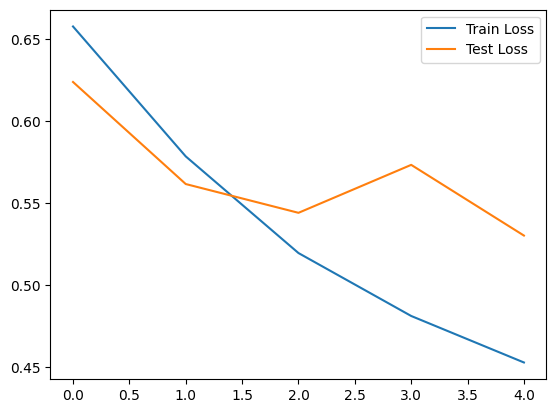

In [94]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.show()

In [95]:
my_input = 'I loved the characters. Adam Sandler is the best!'

In [97]:
tokens = tokenizer(my_input)
tokens

['i',
 'loved',
 'the',
 'characters',
 '.',
 'adam',
 'sandler',
 'is',
 'the',
 'best',
 '!']

In [101]:
tokens_id = torch.tensor(vocab(tokens))
tokens_id = tokens_id.to(device)
tokens_id

tensor([  12,  454,    1,  110,    2, 1725, 2772,    9,    1,  123,   35],
       device='cuda:0')

In [102]:
model(torch.tensor(tokens_id))

<ipython-input-102-3f0713ba925b>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  model(torch.tensor(tokens_id))


tensor([0.9358], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [105]:
my_input = 'Absolute cinema!'
tokens = tokenizer(my_input)
tokens_id = torch.tensor(vocab(tokens))
tokens_id = tokens_id.to(device)
model(torch.tensor(tokens_id))

<ipython-input-105-695a53b2d641>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  model(torch.tensor(tokens_id))


tensor([0.6704], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [114]:
my_input = 'The worst movie ever!!!!!!! But I loved Adam Sandler.'
tokens = tokenizer(my_input)
tokens_id = torch.tensor(vocab(tokens))
tokens_id = tokens_id.to(device)
model(torch.tensor(tokens_id))

<ipython-input-114-4cfe4707ead9>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  model(torch.tensor(tokens_id))


tensor([0.4155], device='cuda:0', grad_fn=<SigmoidBackward0>)